In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import shap

from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [5]:
df = pd.read_csv('train.csv').drop(columns=['id', 'Row#'])
df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.489723,0.435764,34.769578,5628.71053
14996,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.506988,0.458076,36.362837,6331.86722
14997,12.5,0.25,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.00,0.10,0.615612,0.514570,45.718182,8413.65966
14998,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.551234,0.463896,38.130192,6620.09877


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15000 non-null  float64
 1   honeybee              15000 non-null  float64
 2   bumbles               15000 non-null  float64
 3   andrena               15000 non-null  float64
 4   osmia                 15000 non-null  float64
 5   MaxOfUpperTRange      15000 non-null  float64
 6   MinOfUpperTRange      15000 non-null  float64
 7   AverageOfUpperTRange  15000 non-null  float64
 8   MaxOfLowerTRange      15000 non-null  float64
 9   MinOfLowerTRange      15000 non-null  float64
 10  AverageOfLowerTRange  15000 non-null  float64
 11  RainingDays           15000 non-null  float64
 12  AverageRainingDays    15000 non-null  float64
 13  fruitset              15000 non-null  float64
 14  fruitmass             15000 non-null  float64
 15  seeds              

In [7]:
df.nunique()

clonesize                  6
honeybee                   7
bumbles                    9
andrena                   10
osmia                     13
MaxOfUpperTRange           6
MinOfUpperTRange           7
AverageOfUpperTRange       6
MaxOfLowerTRange           5
MinOfLowerTRange           5
AverageOfLowerTRange       9
RainingDays                5
AverageRainingDays         6
fruitset                1084
fruitmass               1112
seeds                   1233
yield                    777
dtype: int64

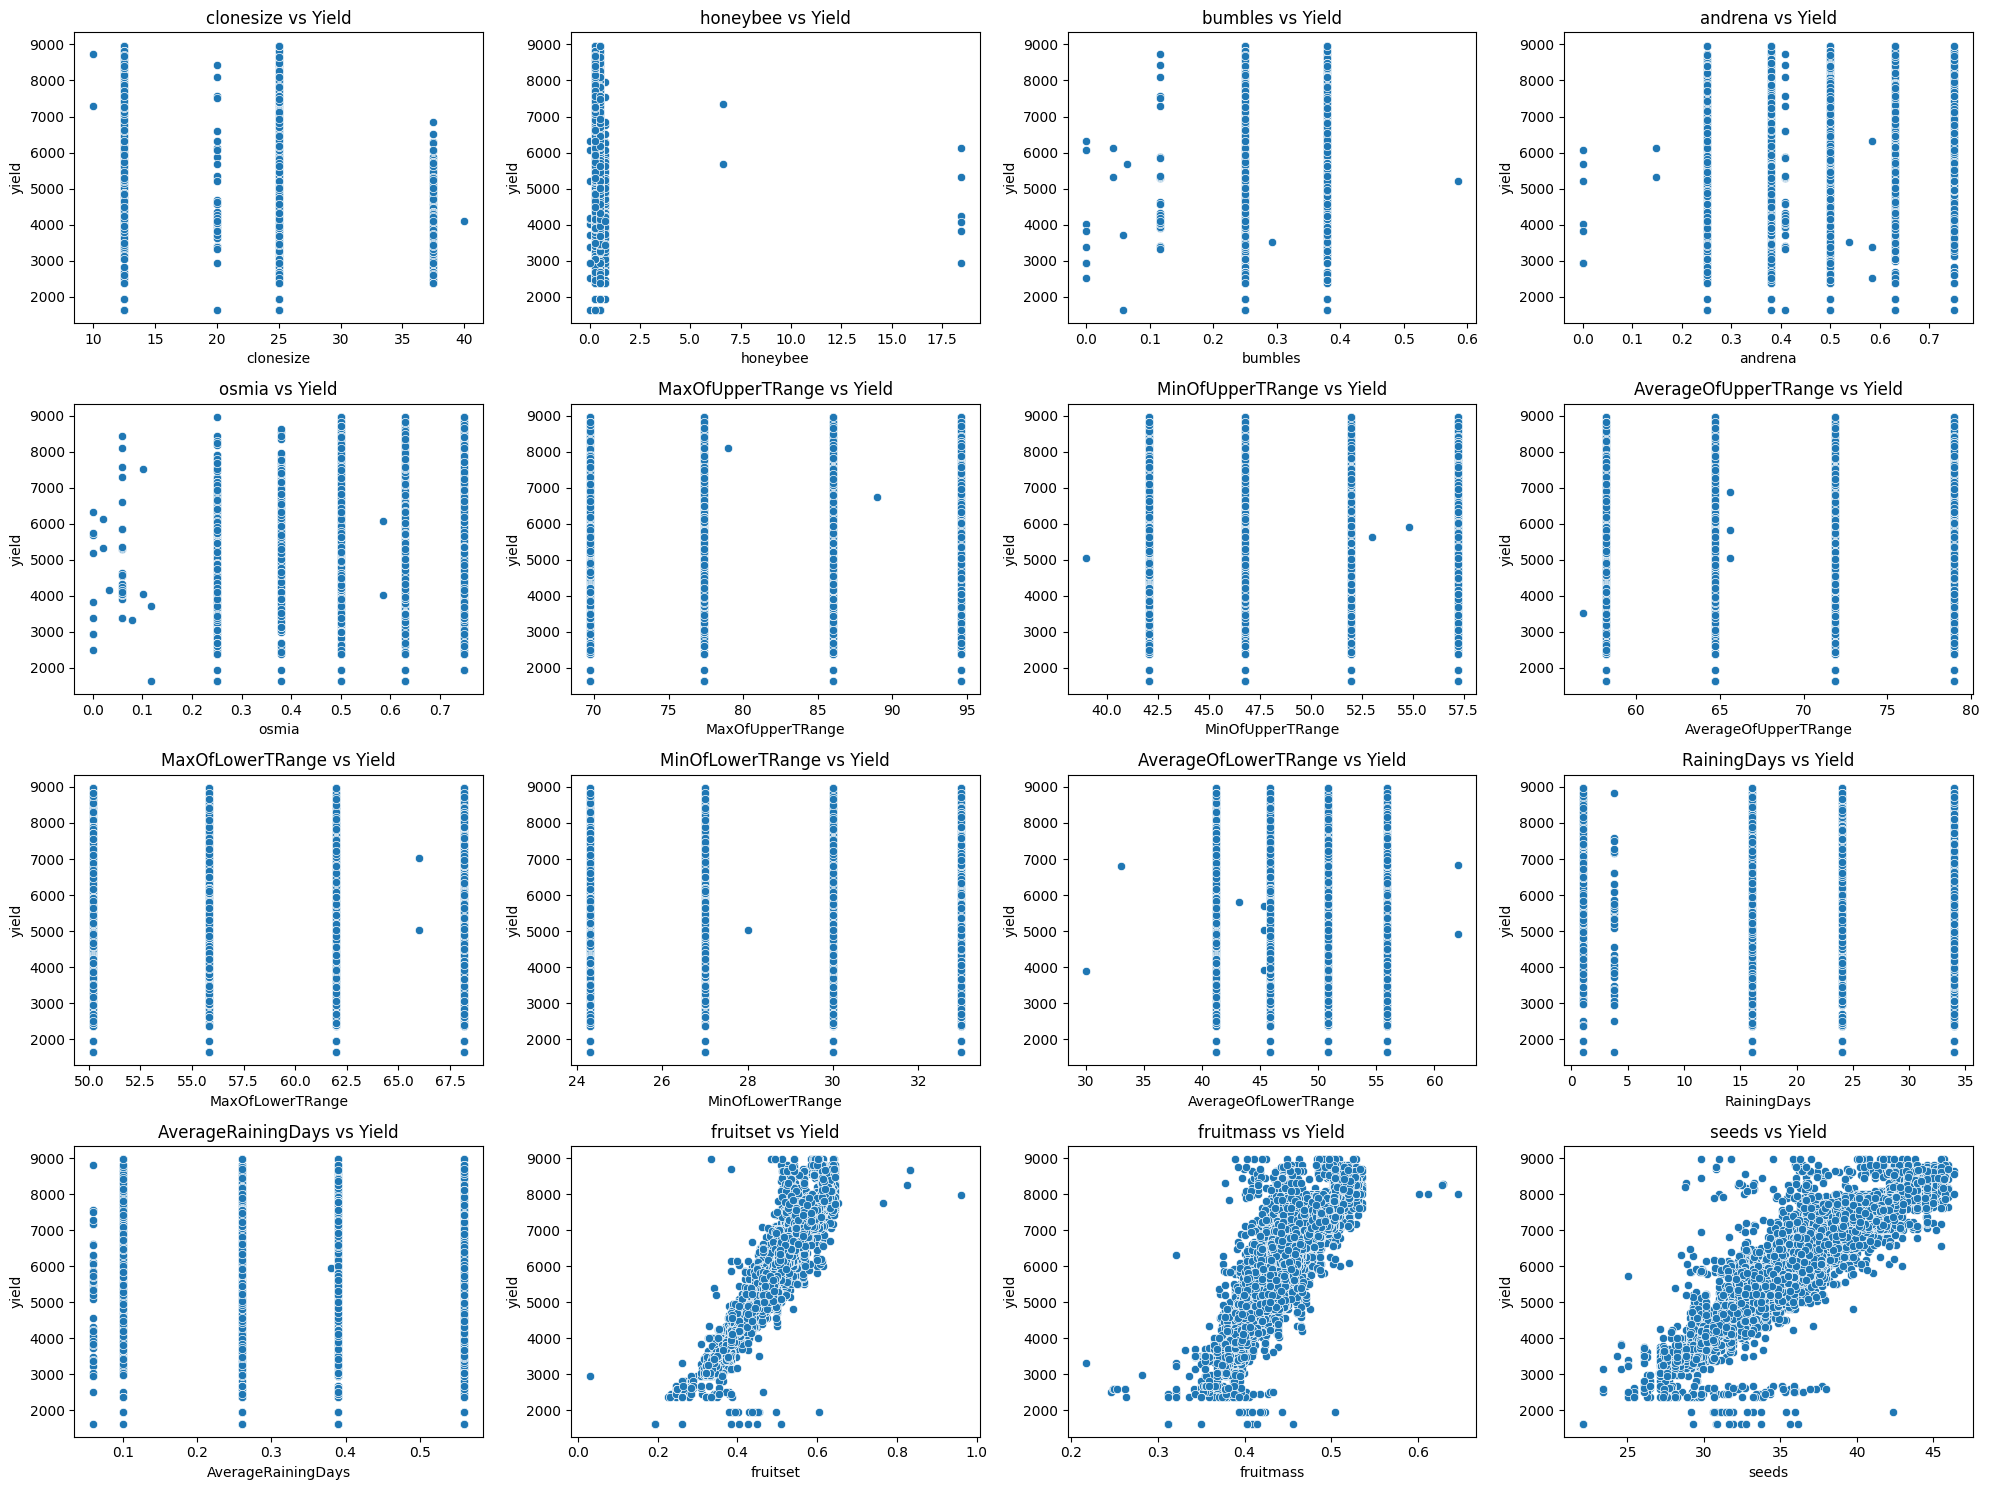

In [8]:

columns = df.columns[:-1].to_list()

plt.figure(figsize=(20, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x=column, y='yield')
    plt.title(f'{column} vs Yield')

plt.tight_layout()
plt.show()


In [9]:
print(columns)

['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']


categorik numeric ustunlar: clonesize, honeybee, bumbles, andrena, osmia, MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, 
MinOfLowerTRange, AverageOfLowerTRange, RainingDays, AverageRainingDays

fruitset, fruitmass, seeds, => chiziqli bogliq



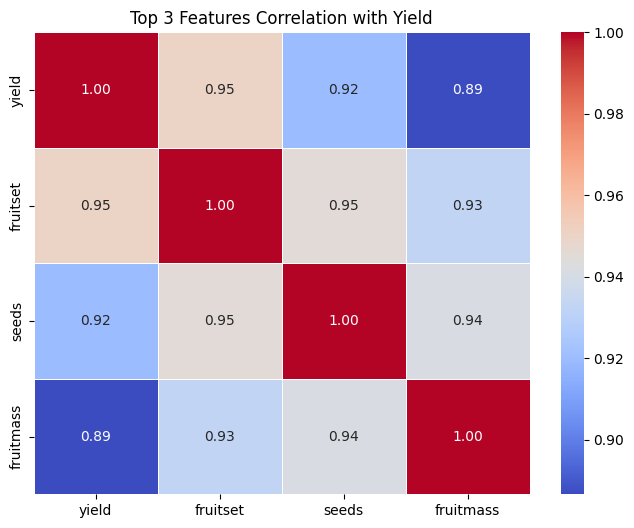

In [10]:
correlation_matrix = df.corr()

top_3_features = correlation_matrix['yield'].abs().sort_values(ascending=False).index[1:4]

top_corr_matrix = df[['yield'] + list(top_3_features)].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Top 3 Features Correlation with Yield")
plt.show()


# ANOVA F test

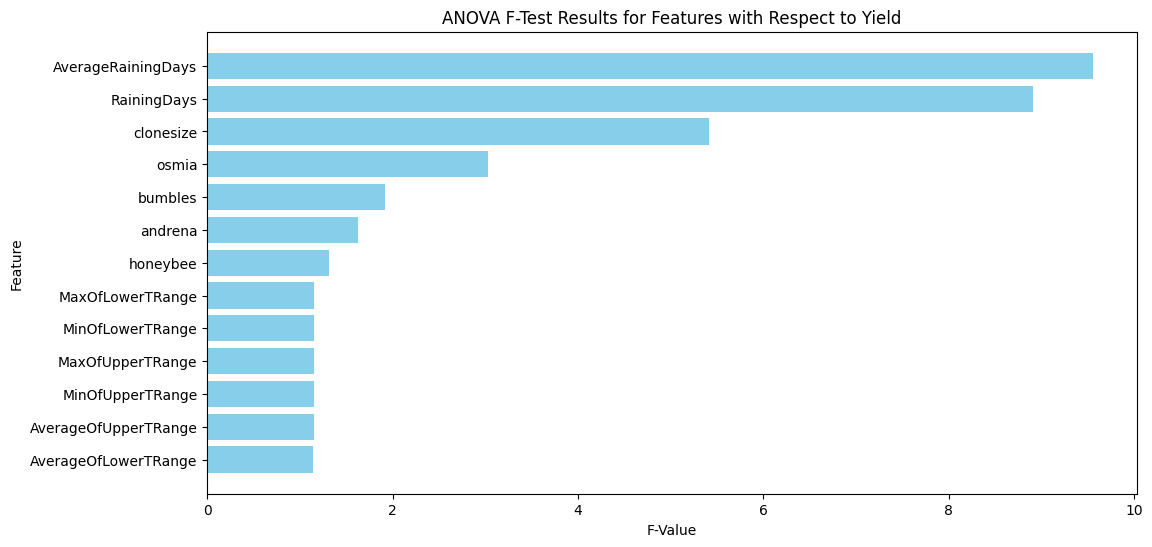

In [11]:
f_values, p_values = f_classif(df[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 
                                   'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 
                                   'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 
                                   'RainingDays', 'AverageRainingDays']], df['yield'])

f_test_results = pd.DataFrame({"Feature": ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 
                                           'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 
                                           'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 
                                           'RainingDays', 'AverageRainingDays'],
                               "F-Value": f_values,
                               "P-Value": p_values})

f_test_results = f_test_results.sort_values(by="F-Value", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(f_test_results['Feature'], f_test_results['F-Value'], color='skyblue')
plt.xlabel("F-Value")
plt.ylabel("Feature")
plt.title("ANOVA F-Test Results for Features with Respect to Yield")
plt.gca().invert_yaxis()
plt.show()


# ETA Squared

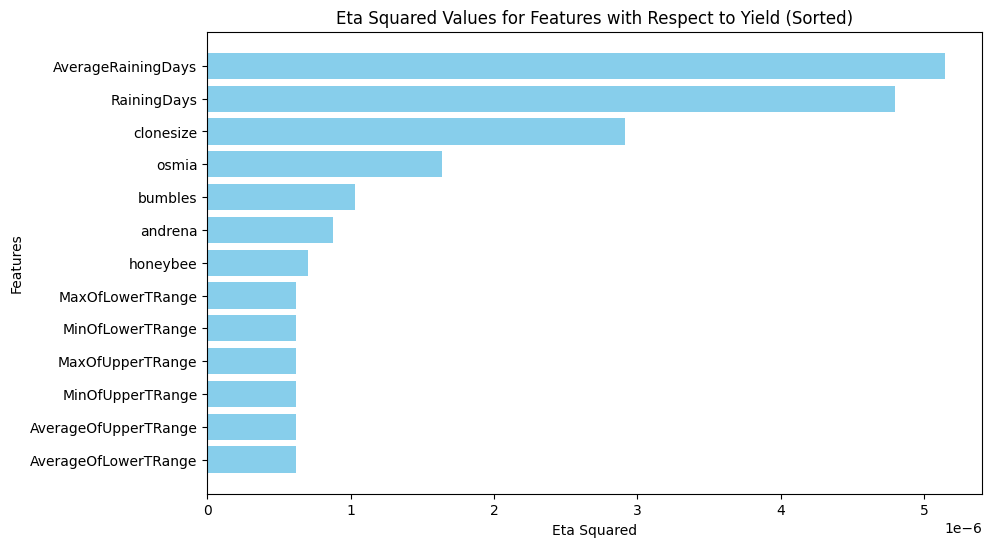

In [12]:
eta_squared_values = {}

for column in ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 
               'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 
               'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 
               'RainingDays', 'AverageRainingDays']:
    
    classes = pd.cut(df[column], bins=10, labels=False)  
    anova_f, _ = f_classif(df[[column]], df['yield'])

    ss_between = anova_f[0] * (len(df) - 1)
    ss_total = np.var(df['yield'], ddof=1) * (len(df) - 1)
    eta_squared = ss_between / ss_total
    eta_squared_values[column] = eta_squared

# Sort eta_squared_values dictionary by values
eta_squared_values = dict(sorted(eta_squared_values.items(), key=lambda item: item[1]))

# Plotting sorted eta squared values
plt.figure(figsize=(10, 6))
plt.barh(list(eta_squared_values.keys()), list(eta_squared_values.values()), color='skyblue')
plt.xlabel('Eta Squared')
plt.ylabel('Features')
plt.title('Eta Squared Values for Features with Respect to Yield (Sorted)')
plt.show()


In [13]:
X = df.drop(columns=['yield'])
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf = RandomForestRegressor(random_state=42, n_estimators=400, max_depth=11, criterion='absolute_error', min_samples_leaf=5, max_features='log2', min_impurity_decrease=0.065)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


254.56904894248692
0.9219070271665225


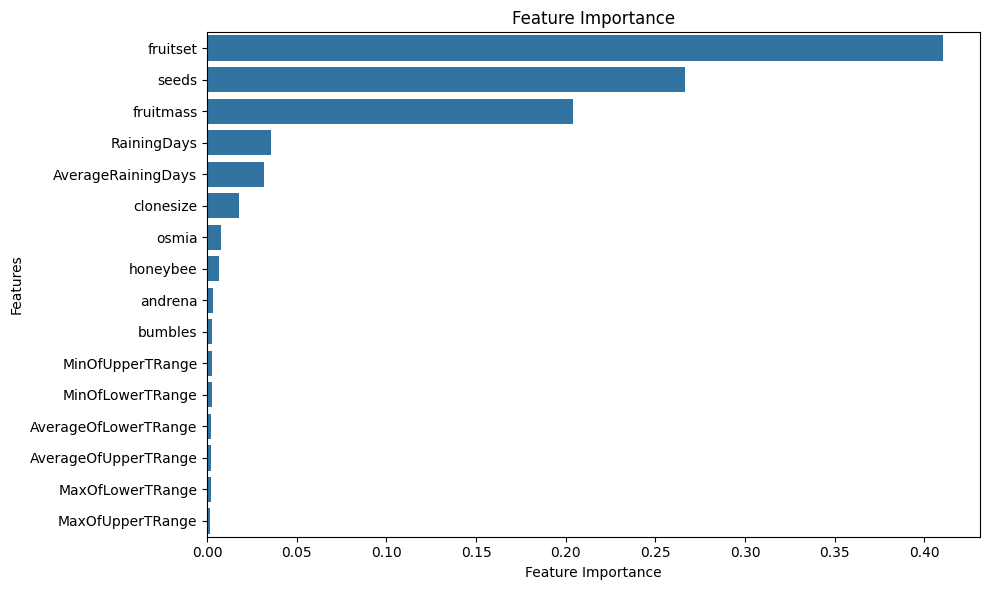

In [15]:
def plot_feature_importance(model, X):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.tight_layout()
    return plt.gcf()

feature_importance_fig = plot_feature_importance(rf, X)

In [16]:
def create_features(df):
    features = df.copy()

    features['seeds_per_mass'] = features['seeds'] / features['fruitmass']
    features['fruit_per_seed'] = features['fruitset'] / features['seeds']
    
    features['total_bees'] = features['honeybee'] + features['bumbles'] + features['andrena'] + features['osmia']
    features['temp_range_total'] = features['AverageOfUpperTRange'] - features['AverageOfLowerTRange']
    features['seeds_per_mass'] = features['seeds'] / features['fruitmass'].replace(0, 1)
    features['fruit_efficiency'] = features['fruitset'] * features['fruitmass']
    features['rain_intensity'] = features['RainingDays'] / features['AverageRainingDays'].replace(0, 1)
    features['fruit_per_clone'] = features['fruitset'] / features['clonesize'].replace(0, 1)
    features['sqrt_seeds'] = np.sqrt(features['seeds']) 
    features['fruitset_squared'] = features['fruitset'] ** 2 
    return features

In [17]:
df = create_features(df)

In [18]:
X = df.drop(columns=['clonesize', 'honeybee', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfUpperTRange', 'MinOfLowerTRange', 'yield'])
y = df['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42, n_estimators=400, max_depth=11, criterion='absolute_error', min_samples_leaf=5, max_features='log2', min_impurity_decrease=0.065)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

238.9153160229082
0.9277587516223946


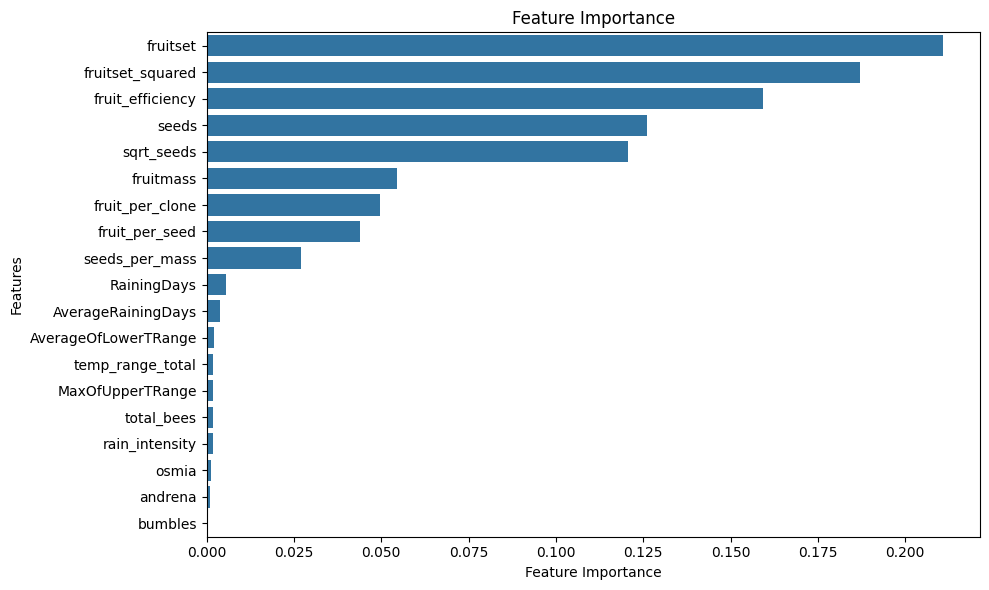

In [19]:
def plot_feature_importance(model, X):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    plt.tight_layout()
    return plt.gcf()

feature_importance_fig = plot_feature_importance(rf, X)

100%|===================| 2995/3000 [04:26<00:00]        

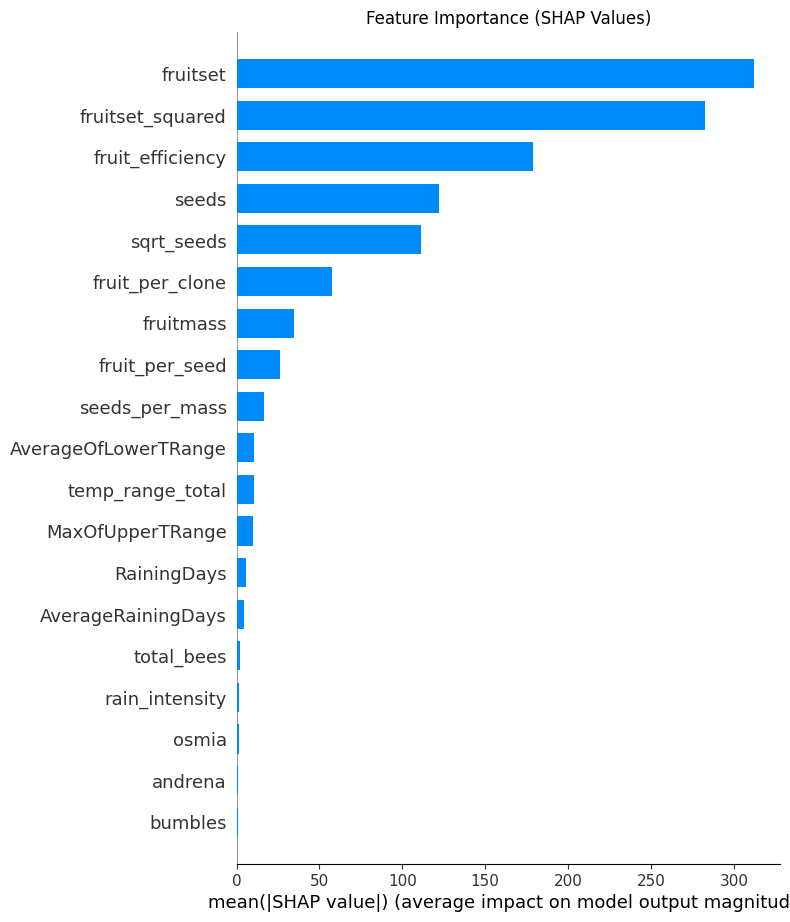

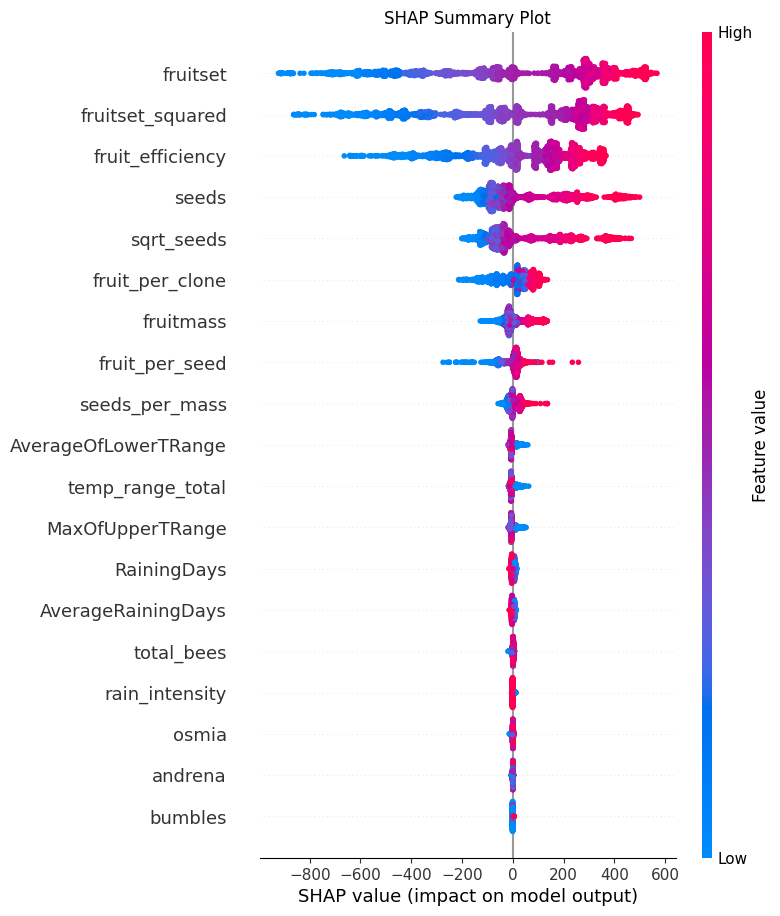

In [20]:
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Feature Importance (SHAP Values)")
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot")
plt.show()


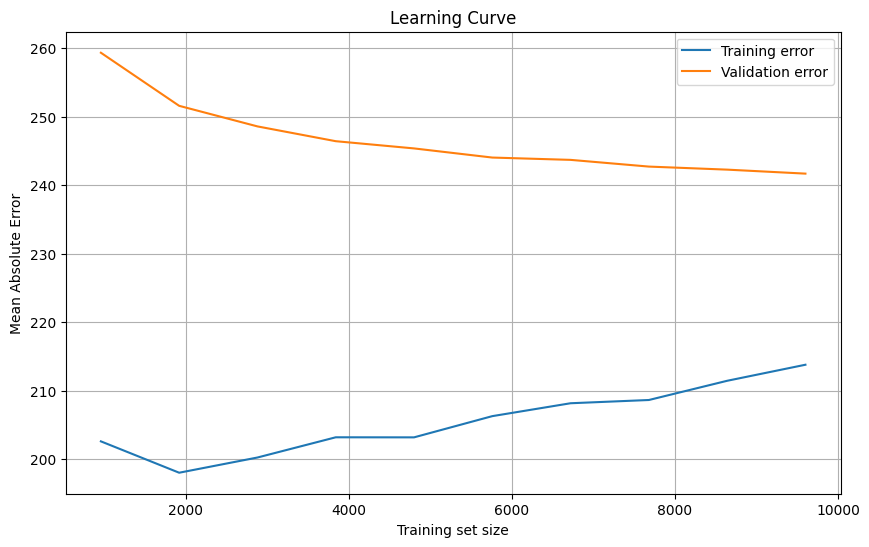

In [21]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error', 
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, test_scores_mean, label='Validation error')
    plt.xlabel('Training set size')
    plt.ylabel('Mean Absolute Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid()
    return plt.gcf()

learning_curve_fig = plot_learning_curve(rf, X_train, y_train, X_test, y_test)